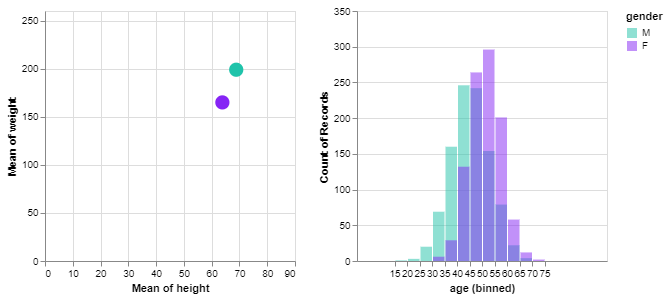

In [4]:
import altair as alt
alt.renderers.enable('notebook')
import pandas as pd
import numpy as np

# generate fake data
source = pd.DataFrame({'gender': ['M']*1000 + ['F']*1000,
               'height':np.concatenate((np.random.normal(69, 7, 1000),
                                       np.random.normal(64, 6, 1000))),
               'weight': np.concatenate((np.random.normal(195.8, 144, 1000),
                                        np.random.normal(167, 100, 1000))),
               'age': np.concatenate((np.random.normal(45, 8, 1000),
                                        np.random.normal(51, 6, 1000)))
        })

selector = alt.selection_single(empty='all', fields=['gender'])

color_scale = alt.Scale(domain=['M', 'F'],
                        range=['#1FC3AA', '#8624F5'])

base = alt.Chart(source).properties(
    width=250,
    height=250
).add_selection(selector)

points = base.mark_point(filled=True, size=200).encode(
    x=alt.X('mean(height):Q',
            scale=alt.Scale(domain=[0,84])),
    y=alt.Y('mean(weight):Q',
            scale=alt.Scale(domain=[0,250])),
    color=alt.condition(selector,
                        'gender:N',
                        alt.value('lightgray'),
                        scale=color_scale),
).interactive()

hists = base.mark_bar(opacity=0.5, thickness=100).encode(
    x=alt.X('age',
            bin=alt.Bin(step=5), # step keeps bin size the same
            scale=alt.Scale(domain=[0,100])),
    y=alt.Y('count()',
            stack=None,
            scale=alt.Scale(domain=[0,350])),
    color=alt.Color('gender:N',
                    scale=color_scale)
).transform_filter(
    selector
)


points | hists

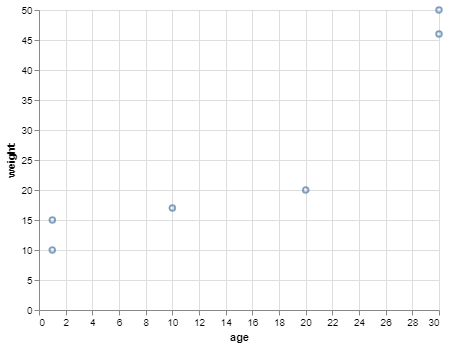

In [42]:
df = pd.DataFrame({'age': [30, 30, 1, 1, 10, 20 ], 'weight': [46, 50, 10, 15, 17, 20]})
chart = alt.Chart(df)
chart.mark_point().encode(x='age', y='weight')

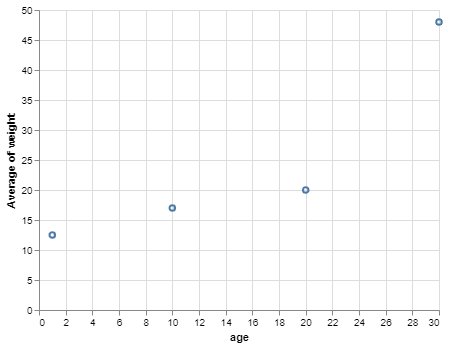

In [43]:
chart.mark_point().encode(x='age', y='average(weight)')

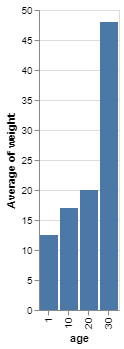

In [48]:
chart.mark_bar().encode(x='age:O', y='average(weight)')

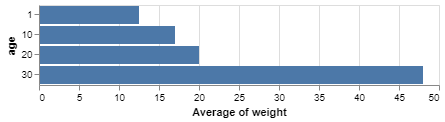

In [50]:
chart.mark_bar().encode(y='age:O', x='average(weight)')

In [53]:
print(chart.mark_bar().encode(y='age:O', x='average(weight)').to_json())

{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.3.0.json",
  "config": {
    "mark": {
      "tooltip": null
    },
    "view": {
      "height": 300,
      "width": 400
    }
  },
  "data": {
    "name": "data-ac14ffa81cac90dd7b22ce89f6da85db"
  },
  "datasets": {
    "data-ac14ffa81cac90dd7b22ce89f6da85db": [
      {
        "age": 30,
        "weight": 46
      },
      {
        "age": 30,
        "weight": 50
      },
      {
        "age": 1,
        "weight": 10
      },
      {
        "age": 1,
        "weight": 15
      },
      {
        "age": 10,
        "weight": 17
      },
      {
        "age": 20,
        "weight": 20
      }
    ]
  },
  "encoding": {
    "x": {
      "aggregate": "average",
      "field": "weight",
      "type": "quantitative"
    },
    "y": {
      "field": "age",
      "type": "ordinal"
    }
  },
  "mark": "bar"
}


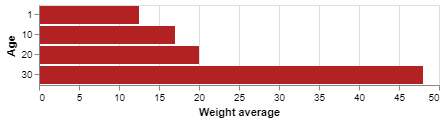

In [60]:
chart.mark_bar(color='firebrick').encode(alt.Y('age:O', title='Age'), alt.X('average(weight)', title='Weight average'))

In [61]:
chart.mark_bar(color='firebrick').encode(alt.Y('age:O', title='Age'), alt.X('average(weight)', title='Weight average')).save('chart.html')

In [63]:
from vega_datasets import data

df = data.seattle_weather()
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


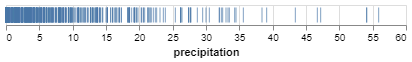

In [70]:
alt.Chart(df).mark_tick().encode(x='precipitation')

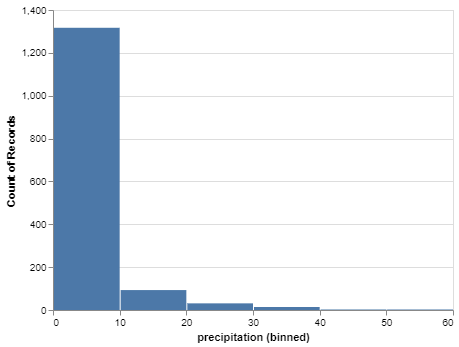

In [74]:
alt.Chart(df).mark_bar().encode( alt.X('precipitation', bin=True), y='count()')

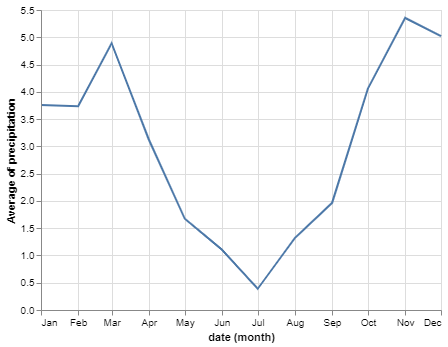

In [81]:
alt.Chart(df).mark_line().encode(x='month(date):T', y='average(precipitation)')